Task: 4 Optimize Portfolio Based on Forecast

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import os, sys
import matplotlib.pyplot as plt

In [ ]:
# Find path
os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

In [10]:
data_path = os.path.join(rpath,'data','tsla.csv')
tsla_data = pd.read_csv(data_path)
tsla_data.rename(columns={'Forecasted_Mean':'tsla_close'}, inplace=True)
tsla_data

,Date,tsla_close,Lower_95_CI,Upper_95_CI
0,2024-11-03 00:00:00+00:00,-0.147724,-0.240864,-0.054585
1,2024-11-10 00:00:00+00:00,-0.035864,-0.130533,0.058805
2,2024-11-17 00:00:00+00:00,-0.106975,-0.202145,-0.011806
3,2024-11-24 00:00:00+00:00,-0.094726,-0.189886,0.000434
4,2024-12-01 00:00:00+00:00,-0.048254,-0.143435,0.046928
5,2024-12-08 00:00:00+00:00,0.052787,-0.042474,0.148048
6,2024-12-15 00:00:00+00:00,0.117783,0.022469,0.213098
7,2024-12-22 00:00:00+00:00,0.027616,-0.068051,0.123282
8,2024-12-29 00:00:00+00:00,-0.047668,-0.143328,0.047993
9,2025-01-05 00:00:00+00:00,-0.005065,-0.100724,0.090594


In [11]:
data_path = os.path.join(rpath,'data','bnd.csv')
bnd_data = pd.read_csv(data_path)
bnd_data.rename(columns={'Forecasted_Mean':'bnd_close'}, inplace=True)
bnd_data

,Date,bnd_close,Lower_95_CI,Upper_95_CI
0,2024-11-03 00:00:00+00:00,0.312809,-0.881478,1.507096
1,2024-11-10 00:00:00+00:00,0.357032,-1.079698,1.793762
2,2024-11-17 00:00:00+00:00,0.546057,-1.165251,2.257364
3,2024-11-24 00:00:00+00:00,0.193832,-1.733373,2.121036
4,2024-12-01 00:00:00+00:00,0.451045,-1.676244,2.578334
5,2024-12-08 00:00:00+00:00,0.233034,-2.075221,2.541289
6,2024-12-15 00:00:00+00:00,0.183233,-2.293368,2.659834
7,2024-12-22 00:00:00+00:00,-0.289853,-2.923886,2.344180
8,2024-12-29 00:00:00+00:00,-0.002636,-2.785263,2.779992
9,2025-01-05 00:00:00+00:00,0.170618,-2.753044,3.094280


In [13]:
data_path = os.path.join(rpath,'data','spy.csv')
spy_data = pd.read_csv(data_path)
spy_data.rename(columns={'Forecasted_Mean':'spy_close'}, inplace=True)
spy_data

,Date,spy_close,Lower_95_CI,Upper_95_CI
0,2024-11-03 00:00:00+00:00,-0.000297,-0.053762,0.053168
1,2024-11-10 00:00:00+00:00,0.018284,-0.047349,0.083917
2,2024-11-17 00:00:00+00:00,0.014860,-0.063332,0.093053
3,2024-11-24 00:00:00+00:00,0.017013,-0.071381,0.105408
4,2024-12-01 00:00:00+00:00,0.035865,-0.061826,0.133557
5,2024-12-08 00:00:00+00:00,0.018843,-0.087292,0.124979
6,2024-12-15 00:00:00+00:00,-0.004353,-0.118320,0.109614
7,2024-12-22 00:00:00+00:00,0.013373,-0.107918,0.134664
8,2024-12-29 00:00:00+00:00,-0.004490,-0.132687,0.123708
9,2025-01-05 00:00:00+00:00,0.019054,-0.115696,0.153805


In [20]:
spy_close = spy_data['spy_close']
bnd_close = bnd_data['bnd_close']
tsla_close = tsla_data[['Date','tsla_close']]
data = tsla_close.join(bnd_close)
data = data.join(spy_close)
data.head()

,Date,tsla_close,bnd_close,spy_close
0,2024-11-03 00:00:00+00:00,-0.147724,0.312809,-0.000297
1,2024-11-10 00:00:00+00:00,-0.035864,0.357032,0.018284
2,2024-11-17 00:00:00+00:00,-0.106975,0.546057,0.014860
3,2024-11-24 00:00:00+00:00,-0.094726,0.193832,0.017013
4,2024-12-01 00:00:00+00:00,-0.048254,0.451045,0.035865


Annual Returns: tsla_close   -0.510607
bnd_close     9.615853
spy_close     0.567502
dtype: float64
Portfolio Return: 2.850764001007411
Portfolio Volatility: 0.7657204779655152
Optimal Weights: [0.         0.02632647 0.97367353]
Value at Risk (VaR) for Tesla: -0.10361688765052295


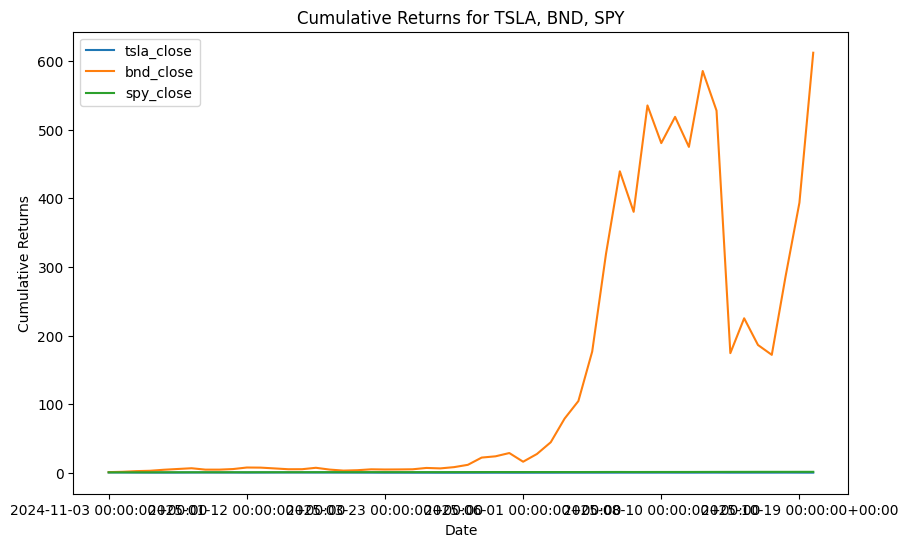

In [31]:
# Calculate annualized return and covariance
weekly_returns = data.mean()
annual_returns = weekly_returns * 52
cov_matrix = data.cov() * 52

# Define weights, portfolio return, and risk (volatility)
weights = np.array([0.4, 0.3, 0.3])  # example weights for TSLA, BND, SPY
portfolio_return = np.dot(weights, annual_returns)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Define the objective function for maximizing Sharpe Ratio
risk_free_rate = 0.02
def neg_sharpe(weights):
    ret = np.dot(weights, annual_returns)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -(ret - risk_free_rate) / vol

# Constraints and bounds for optimization
constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 1) for _ in range(3)]
optimal_result = minimize(neg_sharpe, weights, method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = optimal_result.x

# Calculate VaR (Value at Risk) for Tesla at a 95% confidence level
confidence_level = 0.05
tsla_returns = data['tsla_close']
VaR = np.percentile(tsla_returns, confidence_level * 100)

# Results
print("Annual Returns:", annual_returns)
print("Portfolio Return:", portfolio_return)
print("Portfolio Volatility:", portfolio_volatility)
print("Optimal Weights:", optimal_weights)
print("Value at Risk (VaR) for Tesla:", VaR)

# Plotting cumulative returns for TSLA, BND, and SPY
(data + 1).cumprod().plot(figsize=(10, 6))
plt.title("Cumulative Returns for TSLA, BND, SPY")  # Corrected line
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")
plt.show()